<h1>REGNO UNITO

Confronto dei dati relativi ai decessi registrati da EUROSTAT e i decessi causa COVID-19 registrati con i decessi previsti dal modello predittivo SARIMA.

<h2>DECESSI TOTALI MENSILI REGNO UNITO</h2>

Il DataFrame contiene i dati relativi ai decessi registrati nel <b>Regno Unito</b> dal <b>2015</b> al <b>30 settembre 2020</b>.

In [1]:
import matplotlib.pyplot as plt

import pandas as pd
decessi_tot = pd.read_csv('../../csv/nazioni/serie_storica_uk.csv')
decessi_tot.head()

,TIME,GEO,Value
0,2015-01-05,United Kingdom,13463
1,2015-01-12,United Kingdom,18270
2,2015-01-19,United Kingdom,16703
3,2015-01-26,United Kingdom,15688
4,2015-02-02,United Kingdom,14536


In [2]:
decessi_tot['TIME'] = pd.to_datetime(decessi_tot['TIME'])
decessi_tot.Value = pd.to_numeric(decessi_tot.Value)


<h3>Recupero dei dati inerenti al periodo COVID-19</h3>

In [3]:
decessi_tot = decessi_tot[decessi_tot['TIME'] > '2020-02-29']
decessi_tot.head()

,TIME,GEO,Value
269,2020-03-02,United Kingdom,12310
270,2020-03-09,United Kingdom,12395
271,2020-03-16,United Kingdom,12519
272,2020-03-23,United Kingdom,12093
273,2020-03-30,United Kingdom,12496


<h3>Creazione serie storica dei decessi totali</h3>

In [4]:
decessi_tot = decessi_tot.set_index('TIME')
decessi_tot = decessi_tot.groupby(pd.Grouper(freq='M')).sum()
decessi_tot = decessi_tot.Value
decessi_tot.head()

TIME
2020-03-31    61813
2020-04-30    88375
2020-05-31    64637
2020-06-30    55599
2020-07-31    40570
Freq: M, Name: Value, dtype: int64

<h2>DECESSI COVID REGISTRATI NEL REGNO UNITO</h2>

Il DataFrame contine i dati relativi ai decessi per covid-19 registrati nel <b>Regno Unito</b> da <b> marzo 2020</b> al <b>30 settembre 2020</b>.

In [5]:
covid = pd.read_csv('../../csv/decessi_covid/serie_storica_decessi_covid_uk.csv')
covid.head()

,Unnamed: 0,Date,Value
0,0,2020-01-27,0.0
1,1,2020-02-03,0.0
2,2,2020-02-10,0.0
3,3,2020-02-17,0.0
4,4,2020-02-24,0.0


In [6]:
covid['Date'] = pd.to_datetime(covid['Date'])
covid.Value = pd.to_numeric(covid.Value)

In [7]:
covid = covid[covid['Date'] > '2020-02-29']
covid.head()

,Unnamed: 0,Date,Value
5,5,2020-03-02,0.0
6,6,2020-03-09,2.0
7,7,2020-03-16,41.0
8,8,2020-03-23,246.0
9,9,2020-03-30,1390.0


In [8]:
covid = covid.set_index('Date')
covid = covid.groupby(pd.Grouper(freq='M')).sum()
covid

,Unnamed: 0,Value
Date,,
2020-03-31,35,1679.0
2020-04-30,46,22374.0
2020-05-31,62,11986.0
2020-06-30,100,4365.0
2020-07-31,98,792.0
2020-08-31,145,390.0
2020-09-30,134,491.0


<h3>Creazione serie storica dei decessi COVID-19</h3>

In [9]:
covid = covid.Value
covid.head()

Date
2020-03-31     1679.0
2020-04-30    22374.0
2020-05-31    11986.0
2020-06-30     4365.0
2020-07-31      792.0
Freq: M, Name: Value, dtype: float64

<h2>PREDIZIONE DECESSI MODELLO SARIMA</h2>

Il DataFrame contiene i dati riguardanti i decessi registrati nel <b>Regno Unito</b> secondo la predizione del modello SARIMA applicato. 

In [10]:
predictions = pd.read_csv('../../csv/pred/predictions_SARIMA_uk.csv')
predictions.head()

,Unnamed: 0,predicted_mean
0,2015-01-31,0.000000
1,2015-02-28,62922.895345
2,2015-03-31,59240.279143
3,2015-04-30,60711.098277
4,2015-05-31,54062.811026


In [11]:
predictions.rename(columns={'Unnamed: 0': 'Data', 'predicted_mean':'Totale'}, inplace=True)
predictions.head()

,Data,Totale
0,2015-01-31,0.000000
1,2015-02-28,62922.895345
2,2015-03-31,59240.279143
3,2015-04-30,60711.098277
4,2015-05-31,54062.811026


In [12]:
predictions['Data'] = pd.to_datetime(predictions['Data'])
predictions.Totale = pd.to_numeric(predictions.Totale)

<h3>Recupero dei dati inerenti al periodo COVID-19</h3>

In [13]:
predictions = predictions[predictions['Data'] > '2020-02-29']
predictions.head()

,Data,Totale
62,2020-03-31,53357.978310
63,2020-04-30,53238.187839
64,2020-05-31,46680.599289
65,2020-06-30,46203.854984
66,2020-07-31,47817.175200


In [14]:
predictions = predictions.set_index('Data')
predictions.head()

,Totale
Data,
2020-03-31,53357.978310
2020-04-30,53238.187839
2020-05-31,46680.599289
2020-06-30,46203.854984
2020-07-31,47817.175200


<h3>Creazione serie storica dei decessi secondo la predizione del modello</h3>

In [15]:
predictions = predictions.Totale

<h1>INTERVALLI DI CONFIDENZA </h1>

<h3>Limite massimo

In [16]:
upper = pd.read_csv('../../csv/upper/predictions_SARIMA_uk_upper.csv')
upper.head()

,Unnamed: 0,upper Value
0,2015-01-31,105661.242571
1,2015-02-28,83277.729189
2,2015-03-31,76502.378359
3,2015-04-30,75706.540973
4,2015-05-31,68965.020595


In [17]:
upper.rename(columns={'Unnamed: 0': 'Data', 'upper Value':'Totale'}, inplace=True)
upper['Data'] = pd.to_datetime(upper['Data'])
upper.Totale = pd.to_numeric(upper.Totale)
upper.head()

,Data,Totale
0,2015-01-31,105661.242571
1,2015-02-28,83277.729189
2,2015-03-31,76502.378359
3,2015-04-30,75706.540973
4,2015-05-31,68965.020595


In [18]:
upper = upper[upper['Data'] > '2020-02-29']
upper = upper.set_index('Data')
upper.head()

,Totale
Data,
2020-03-31,65438.977266
2020-04-30,65456.378040
2020-05-31,59044.194428
2020-06-30,58651.595100
2020-07-31,60368.304707


In [19]:
upper = upper.Totale

<h3>Limite minimo

In [20]:
lower = pd.read_csv('../../csv/lower/predictions_SARIMA_uk_lower.csv')
lower.head()

,Unnamed: 0,lower Value
0,2015-01-31,-105661.242571
1,2015-02-28,42568.061502
2,2015-03-31,41978.179927
3,2015-04-30,45715.655581
4,2015-05-31,39160.601457


In [21]:
lower.rename(columns={'Unnamed: 0': 'Data', 'lower Value':'Totale'}, inplace=True)
lower['Data'] = pd.to_datetime(lower['Data'])
lower.Totale = pd.to_numeric(lower.Totale)
lower.head()

,Data,Totale
0,2015-01-31,-105661.242571
1,2015-02-28,42568.061502
2,2015-03-31,41978.179927
3,2015-04-30,45715.655581
4,2015-05-31,39160.601457


In [22]:
lower = lower[lower['Data'] > '2020-02-29']
lower = lower.set_index('Data')
lower.head()

,Totale
Data,
2020-03-31,41276.979354
2020-04-30,41019.997637
2020-05-31,34317.004149
2020-06-30,33756.114868
2020-07-31,35266.045693


In [23]:
lower = lower.Totale

<h1> CONFRONTO DELLE SERIE STORICHE </h1>

Di seguito il confronto grafico tra le serie storiche dei <b>decessi totali</b>, dei <b>decessi causa COVID-19</b> e dei <b>decessi previsti dal modello SARIMA</b> registrati nel <b>Regno Unito</b>.
<br />
I mesi di riferimento sono: <b>marzo</b>, <b>aprile</b>, <b>maggio</b>, <b>giugno</b>, <b>luglio</b>, <b>agosto</b> e <b>settembre</b>.

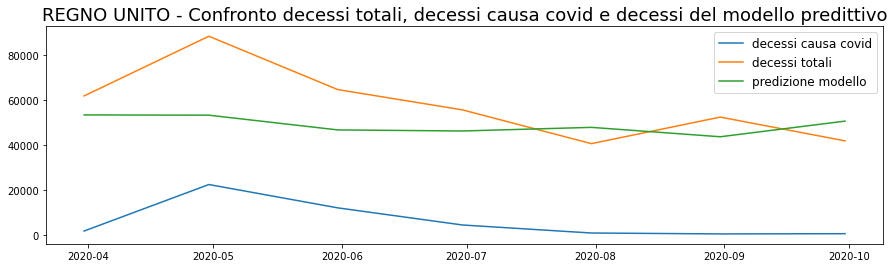

In [24]:
plt.figure(figsize=(15,4))
plt.title('REGNO UNITO - Confronto decessi totali, decessi causa covid e decessi del modello predittivo', size=18)
plt.plot(covid, label='decessi causa covid')
plt.plot(decessi_tot, label='decessi totali')
plt.plot(predictions, label='predizione modello')
plt.legend(prop={'size': 12})
plt.show()

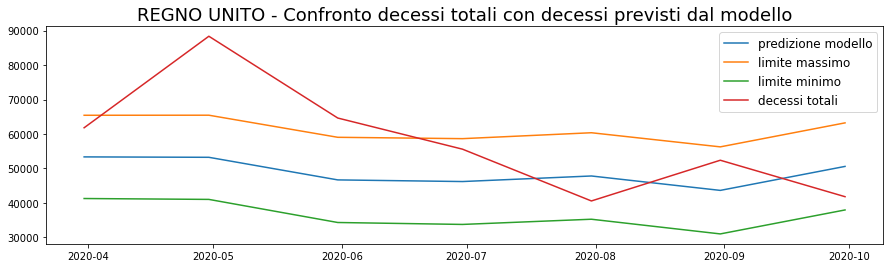

In [25]:
plt.figure(figsize=(15,4))
plt.title("REGNO UNITO - Confronto decessi totali con decessi previsti dal modello", size=18)
plt.plot(predictions, label='predizione modello')
plt.plot(upper, label='limite massimo')
plt.plot(lower, label='limite minimo')
plt.plot(decessi_tot, label='decessi totali')
plt.legend(prop={'size': 12})
plt.show()

<h3>Calcolo dei decessi COVID-19 secondo il modello predittivo</h3>

Differenza tra i decessi totali e i decessi secondo la previsione del modello SARIMA.

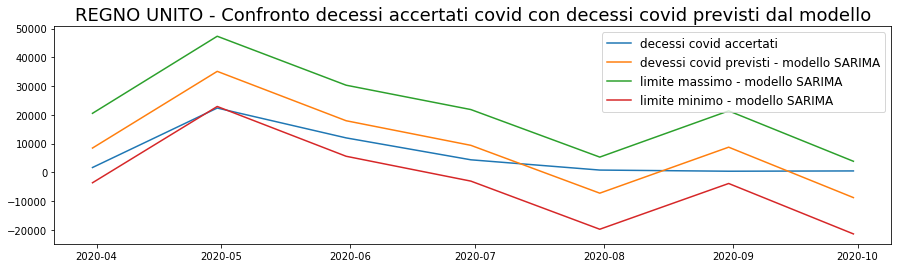

In [26]:
n = decessi_tot - predictions
n_upper = decessi_tot - lower
n_lower = decessi_tot - upper

plt.figure(figsize=(15,4))
plt.title("REGNO UNITO - Confronto decessi accertati covid con decessi covid previsti dal modello", size=18)
plt.plot(covid, label='decessi covid accertati')
plt.plot(n, label='devessi covid previsti - modello SARIMA')
plt.plot(n_upper, label='limite massimo - modello SARIMA')
plt.plot(n_lower, label='limite minimo - modello SARIMA')
plt.legend(prop={'size': 12})
plt.show()

Gli <b>intervalli</b> corrispondono alla differenza tra i decessi totali per i mesi di marzo, aprile, maggio, giugno, luglio e settembre 2020 e i valori degli <b>intervalli di confidenza</b> (intervallo superiore e intervallo inferiore) del modello predittivo SARIMA dei medesimi mesi.

<h3>Numero totale dei decessi accertati COVID-19 registrati nel Regno Unito</h3>

In [27]:
m = covid.sum()
print(int(m))

42077


<h3>Numero totale dei decessi COVID-19 previsti dal modello per il Regno Unito</h3>

<h4>Valore medio

In [28]:
total = n.sum()
print(int(total))

63662


<h4>Valore massimo

In [29]:
total_upper = n_upper.sum()
print(int(total_upper))

150593


<h4>Valore minimo

In [30]:
total_lower = n_lower.sum()
print(int(total_lower))

-23268


<h3>Calcolo del numero dei decessi COVID-19 non registrati secondo il modello predittivo SARIMA nel Regno Unito</h3>

<h4>Valore medio

In [31]:
x = decessi_tot - predictions - covid
x = x.sum()
print(int(x))

21585


<h4>Valore massimo

In [32]:
x_upper = decessi_tot - lower - covid
x_upper = x_upper.sum()
print(int(x_upper))

108516


<h4>Valore minimo

In [33]:
x_lower = decessi_tot - upper - covid
x_lower = x_lower.sum()
print(int(x_lower))

-65345
